# Imports and Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, classification_report
)
from sklearn.ensemble import (
    GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")


# Load and Explore Data

In [5]:
# Cell 2: Load and Explore Data
# Load dataset
df = pd.read_csv('PSL Complete Dataset (2016-2025).csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic info
print("\n=== Dataset Info ===")
print(df.info())

# Show first few rows
print("\n=== First 5 Rows ===")
display(df.head())

# Show numeric summary
print("\n=== Numeric Summary ===")
display(df.describe())

# Check for missing values
print("\n=== Missing Values ===")
missing = df.isnull().sum()
print(missing[missing > 0])



Dataset loaded successfully!
Shape: (73784, 27)
Columns: ['id', 'match_id', 'date', 'season', 'venue', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'winner', 'win_by', 'match_type', 'player_of_match', 'umpire_1', 'umpire_2']

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73784 entries, 0 to 73783
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                73784 non-null  int64 
 1   match_id          73784 non-null  int64 
 2   date              73784 non-null  object
 3   season            73784 non-null  int64 
 4   venue             73784 non-null  object
 5   inning            73784 non-null  int64 
 6   batting_team      73784 non-null  object
 7   bowling_team      73784 non-null  object
 8   over      

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2
0,1,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,1,...,True,Mohammad Hafeez,caught,Sharjeel Khan,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
1,2,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,2,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
2,3,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,3,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
3,4,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,4,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
4,5,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,5,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza



=== Numeric Summary ===


,id,match_id,season,inning,over,ball,batsman_runs,extra_runs,total_runs
count,73784.000000,7.378400e+04,73784.000000,73784.000000,73784.000000,73784.000000,73784.000000,73784.000000,73784.000000
mean,276.413952,1.247840e+06,2020.776578,1.481622,10.113182,3.618901,1.290700,0.070205,1.360905
std,114.270171,1.430635e+05,2.759063,0.502263,5.644703,1.812546,1.667167,0.359813,1.654922
min,1.000000,9.591750e+05,2016.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,193.000000,1.128851e+06,2018.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,277.000000,1.247024e+06,2021.000000,1.000000,10.000000,4.000000,1.000000,0.000000,1.000000
75%,360.000000,1.354945e+06,2023.000000,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000
max,555.000000,1.475271e+06,2025.000000,4.000000,20.000000,11.000000,6.000000,5.000000,7.000000



=== Missing Values ===
extras_type         69772
player_dismissed    69818
dismissal_kind      69818
fielder             71148
player_of_match       736
dtype: int64


# Data Cleaning

In [6]:
# Clean the data
def clean_data(df):
    # Fill missing values
    df.fillna({
        'extras_type': 'none',
        'dismissal_kind': 'not out',
        'fielder': 'none',
        'umpire_1': 'unknown',
        'umpire_2': 'unknown'
    }, inplace=True)
    
    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Create match year if season is missing
    df['season'] = df['season'].fillna(df['date'].dt.year)
    
    return df

df = clean_data(df)
print("Data cleaning completed!")

Data cleaning completed!


# Top Batsmen Analysis


In [7]:

# Calculate total runs per batter
batter_stats = df.groupby('batter').agg({
    'batsman_runs': 'sum',
    'match_id': 'nunique',  # number of matches
    'is_wicket': 'sum'  # times dismissed
}).rename(columns={
    'batsman_runs': 'total_runs',
    'match_id': 'matches_played',
    'is_wicket': 'times_out'
})

# Calculate average
batter_stats['average'] = batter_stats['total_runs'] / batter_stats['times_out'].replace(0, 1)
batter_stats['strike_rate'] = (df.groupby('batter')['batsman_runs'].sum() / 
                               df.groupby('batter').size()) * 100

# Get top 10 batters
top_10_batters = batter_stats.nlargest(10, 'total_runs')
print("=== Top 10 Batters (All Time) ===")
display(top_10_batters)


=== Top 10 Batters (All Time) ===


,total_runs,matches_played,times_out,average,strike_rate
batter,,,,,
Babar Azam,3792,97,87,43.586207,124.083770
Fakhar Zaman,2969,97,100,29.690000,138.285980
Mohammad Rizwan,2770,82,67,41.343284,124.718595
Shoaib Malik,2350,87,75,31.333333,124.076030
RR Rossouw,2292,88,72,31.833333,142.095474
Kamran Akmal,1942,73,69,28.144928,133.470790
Mohammad Hafeez,1672,73,62,26.967742,120.374370
C Munro,1633,54,50,32.660000,146.326165
Sarfraz Ahmed,1525,73,58,26.293103,119.514107


# Top Batsmen Visualization

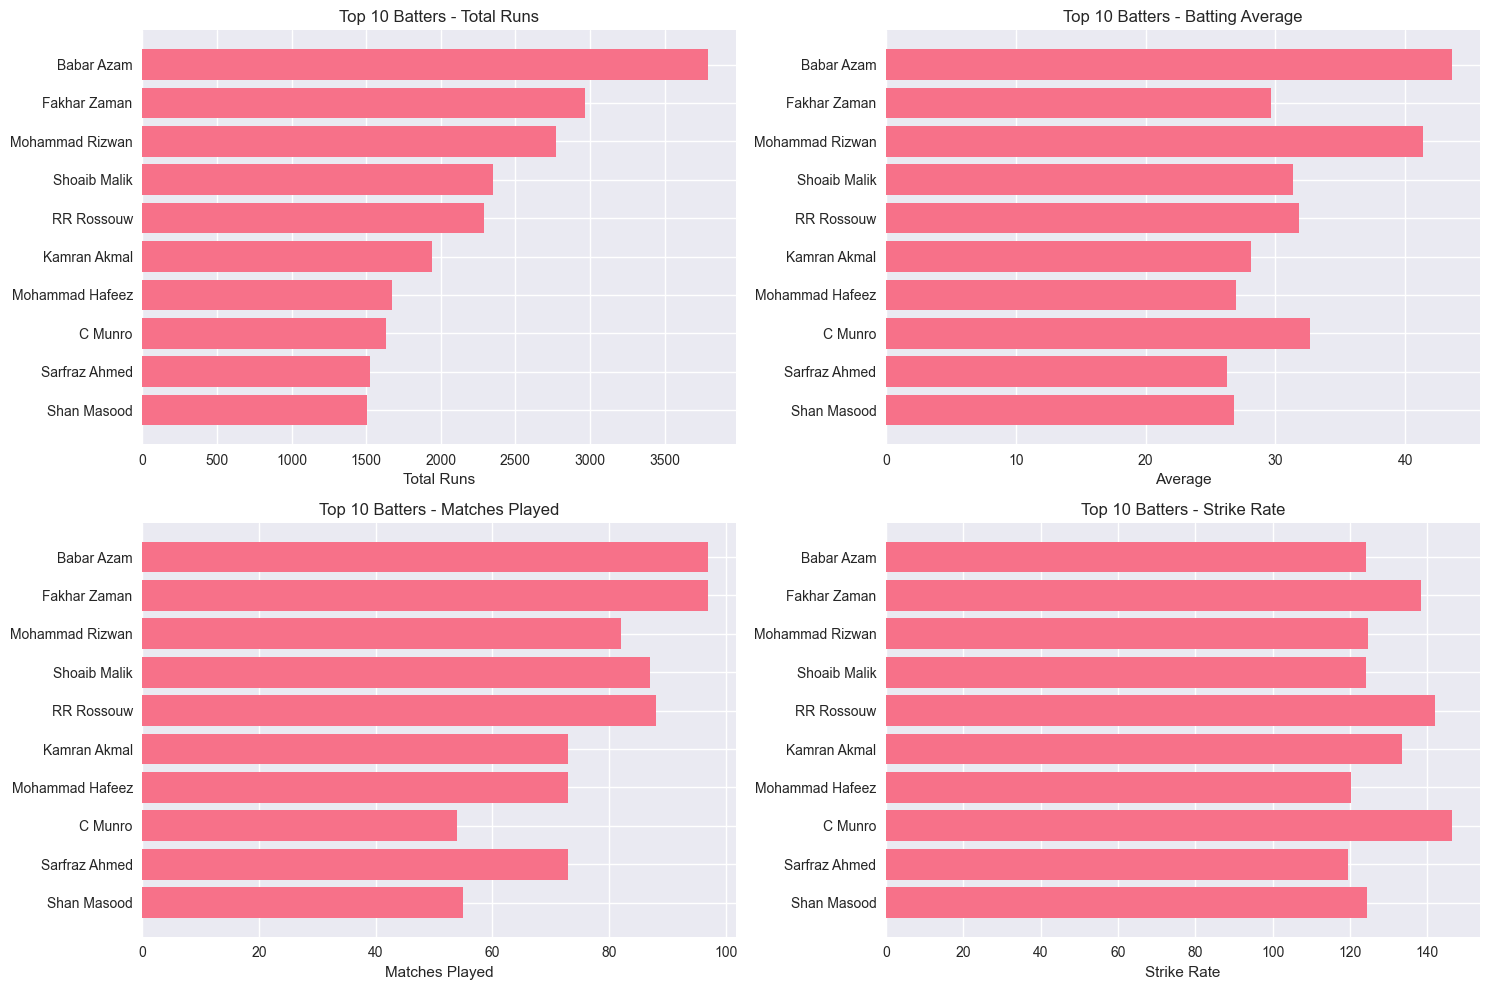

In [8]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Total runs
axes[0, 0].barh(top_10_batters.index, top_10_batters['total_runs'])
axes[0, 0].set_xlabel('Total Runs')
axes[0, 0].set_title('Top 10 Batters - Total Runs')
axes[0, 0].invert_yaxis()

# Plot 2: Average
axes[0, 1].barh(top_10_batters.index, top_10_batters['average'])
axes[0, 1].set_xlabel('Average')
axes[0, 1].set_title('Top 10 Batters - Batting Average')
axes[0, 1].invert_yaxis()

# Plot 3: Matches played
axes[1, 0].barh(top_10_batters.index, top_10_batters['matches_played'])
axes[1, 0].set_xlabel('Matches Played')
axes[1, 0].set_title('Top 10 Batters - Matches Played')
axes[1, 0].invert_yaxis()

# Plot 4: Strike Rate
axes[1, 1].barh(top_10_batters.index, top_10_batters['strike_rate'])
axes[1, 1].set_xlabel('Strike Rate')
axes[1, 1].set_title('Top 10 Batters - Strike Rate')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Recent Performance (Last 3 Seasons)

In [9]:

# Cell 6: Recent Performance (Last 3 Seasons)
# Get data for last 3 seasons
recent_seasons = [2023, 2024, 2025]
df_recent = df[df['season'].isin(recent_seasons)]

# Calculate recent performance
recent_stats = df_recent.groupby('batter').agg({
    'batsman_runs': 'sum',
    'match_id': 'nunique'
}).rename(columns={
    'batsman_runs': 'recent_runs',
    'match_id': 'recent_matches'
})

# Merge with overall stats
batter_comparison = batter_stats.merge(recent_stats, left_index=True, right_index=True, how='left')
batter_comparison['recent_avg'] = batter_comparison['recent_runs'] / batter_comparison['recent_matches']

print("=== Recent Performance (Last 3 Seasons) ===")
display(batter_comparison.nlargest(10, 'recent_runs')[['total_runs', 'recent_runs', 'recent_matches', 'recent_avg']])


=== Recent Performance (Last 3 Seasons) ===


,total_runs,recent_runs,recent_matches,recent_avg
batter,,,,
Babar Azam,3792,1379.0,32.0,43.093750
Mohammad Rizwan,2770,1324.0,34.0,38.941176
Fakhar Zaman,2969,1025.0,34.0,30.147059
RR Rossouw,2292,873.0,30.0,29.100000
Saim Ayub,974,860.0,33.0,26.060606
C Munro,1633,840.0,28.0,30.000000
Abdullah Shafique,1068,817.0,28.0,29.178571
Usman Khan,960,810.0,19.0,42.631579
JM Vince,1500,766.0,25.0,30.640000


# Performance by Season Visualization

<Figure size 1200x600 with 0 Axes>

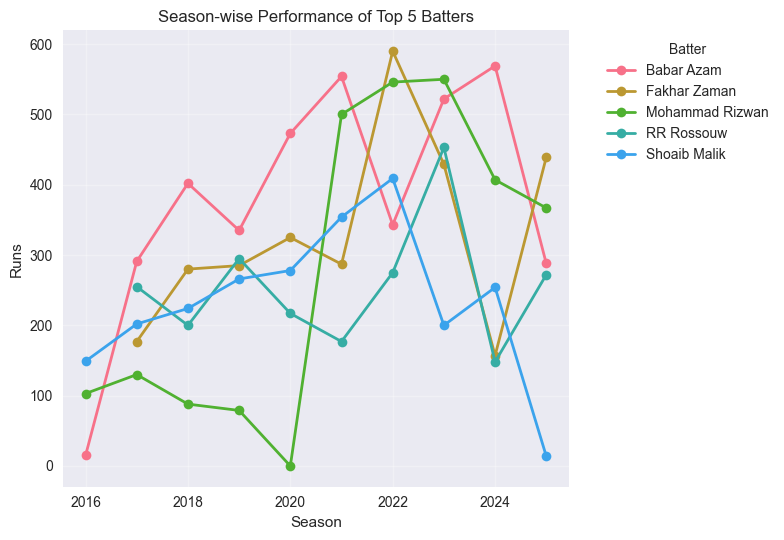

In [10]:

# Get top 5 batters
top_5_batters = top_10_batters.head(5).index

# Create season-wise performance
season_performance = df[df['batter'].isin(top_5_batters)].groupby(['batter', 'season'])['batsman_runs'].sum().unstack()

plt.figure(figsize=(12, 6))
season_performance.T.plot(marker='o', linewidth=2)
plt.title('Season-wise Performance of Top 5 Batters')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.legend(title='Batter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Next Match Score Prediction (Simple)

=== Next Match Score Predictions ===


,batter,predicted_score,last_10_avg,last_10_std,max_last_10,min_last_10,form_trend
0,Babar Azam,36.1,28.8,31.7,94,0,up
4,RR Rossouw,32.4,27.7,29.5,104,1,up
1,Fakhar Zaman,29.7,29.5,20.6,60,0,down
7,C Munro,27.8,32.6,26.7,84,4,down
2,Mohammad Rizwan,27.1,36.7,32.6,105,0,down
5,Kamran Akmal,25.9,26.2,19.4,58,4,up
6,Mohammad Hafeez,25.1,28.1,23.5,69,0,down
3,Shoaib Malik,19.7,21.5,12.9,39,1,down
9,Shan Masood,11.1,13.3,12.4,36,0,down
8,Sarfraz Ahmed,9.4,13.8,14.1,41,0,down


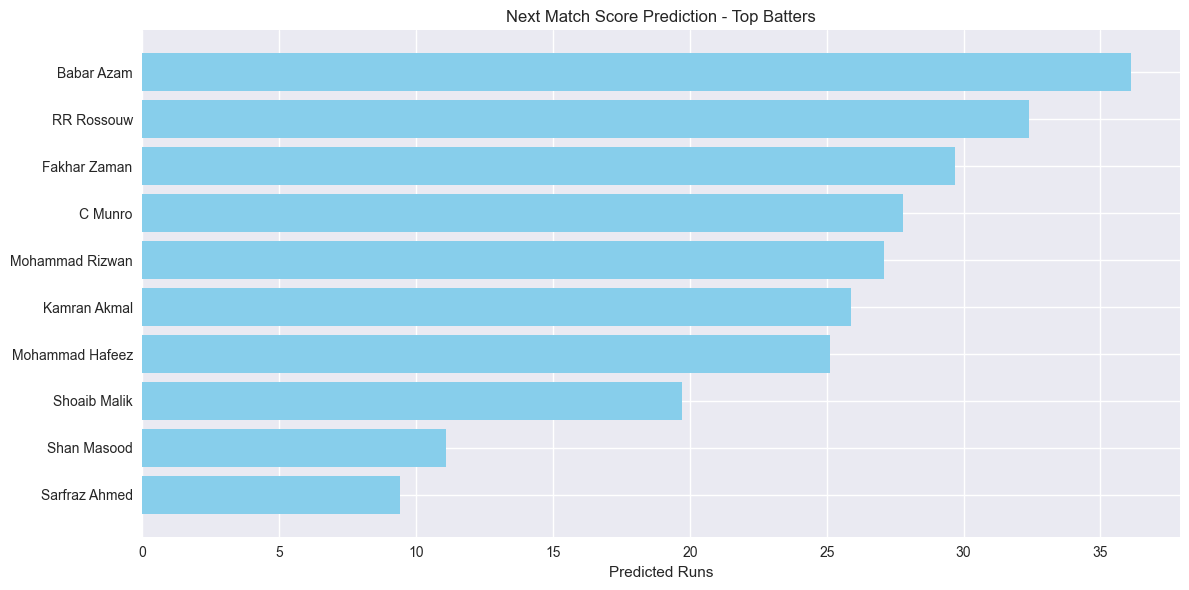

In [11]:

# Cell 8: Next Match Score Prediction (Simple)
def predict_next_match_score(batter_name, df, n_matches=10):
    """Predict next match score based on recent form"""
    # Get batter data
    batter_data = df[df['batter'] == batter_name]
    
    if len(batter_data) == 0:
        return None
    
    # Get runs per match
    match_runs = batter_data.groupby('match_id')['batsman_runs'].sum()
    
    if len(match_runs) == 0:
        return None
    
    # Get last n matches
    last_n = match_runs.tail(n_matches)
    
    # Simple prediction: weighted average (recent matches more weight)
    weights = np.arange(1, len(last_n) + 1)  # Linear weights
    weighted_avg = np.average(last_n, weights=weights)
    
    return {
        'batter': batter_name,
        'predicted_score': round(weighted_avg, 1),
        'last_10_avg': round(last_n.mean(), 1),
        'last_10_std': round(last_n.std(), 1),
        'max_last_10': int(last_n.max()),
        'min_last_10': int(last_n.min()),
        'form_trend': 'up' if last_n.iloc[-1] > last_n.iloc[0] else 'down'
    }

# Predict for top 10 batters
predictions = []
for batter in top_10_batters.index:
    pred = predict_next_match_score(batter, df)
    if pred:
        predictions.append(pred)

predictions_df = pd.DataFrame(predictions).sort_values('predicted_score', ascending=False)
print("=== Next Match Score Predictions ===")
display(predictions_df)

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.barh(predictions_df['batter'], predictions_df['predicted_score'], color='skyblue')
plt.xlabel('Predicted Runs')
plt.title('Next Match Score Prediction - Top Batters')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Bowler Analysis

In [12]:

# Calculate bowler statistics
bowler_stats = df.groupby('bowler').agg({
    'is_wicket': 'sum',
    'total_runs': 'sum',
    'over': 'count',  # balls bowled
    'match_id': 'nunique'
}).rename(columns={
    'is_wicket': 'total_wickets',
    'total_runs': 'runs_conceded',
    'over': 'balls_bowled',
    'match_id': 'matches_played'
})

# Calculate bowling metrics
bowler_stats['bowling_average'] = bowler_stats['runs_conceded'] / bowler_stats['total_wickets'].replace(0, 1)
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / (bowler_stats['balls_bowled'] / 6)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['total_wickets'].replace(0, 1)

# Get top 10 bowlers
top_10_bowlers = bowler_stats.nlargest(10, 'total_wickets')
print("=== Top 10 Bowlers (All Time) ===")
display(top_10_bowlers)

=== Top 10 Bowlers (All Time) ===


,total_wickets,runs_conceded,balls_bowled,matches_played,bowling_average,economy_rate,strike_rate
bowler,,,,,,,
Hasan Ali,138,2900,2141,91,21.014493,8.127043,15.514493
Shaheen Shah Afridi,131,2563,1973,83,19.564885,7.794222,15.061069
Wahab Riaz,126,2624,2060,86,20.825397,7.642718,16.349206
Shadab Khan,109,2571,2017,92,23.587156,7.647992,18.504587
Faheem Ashraf,102,2329,1627,82,22.833333,8.588814,15.950980
Mohammad Amir,98,2413,1938,82,24.622449,7.470588,19.775510
Haris Rauf,86,2452,1611,69,28.511628,9.132216,18.732558
Imad Wasim,82,2277,1935,96,27.768293,7.060465,23.597561
Sohail Tanvir,67,1738,1329,58,25.940299,7.846501,19.835821


# Bowler Visualization

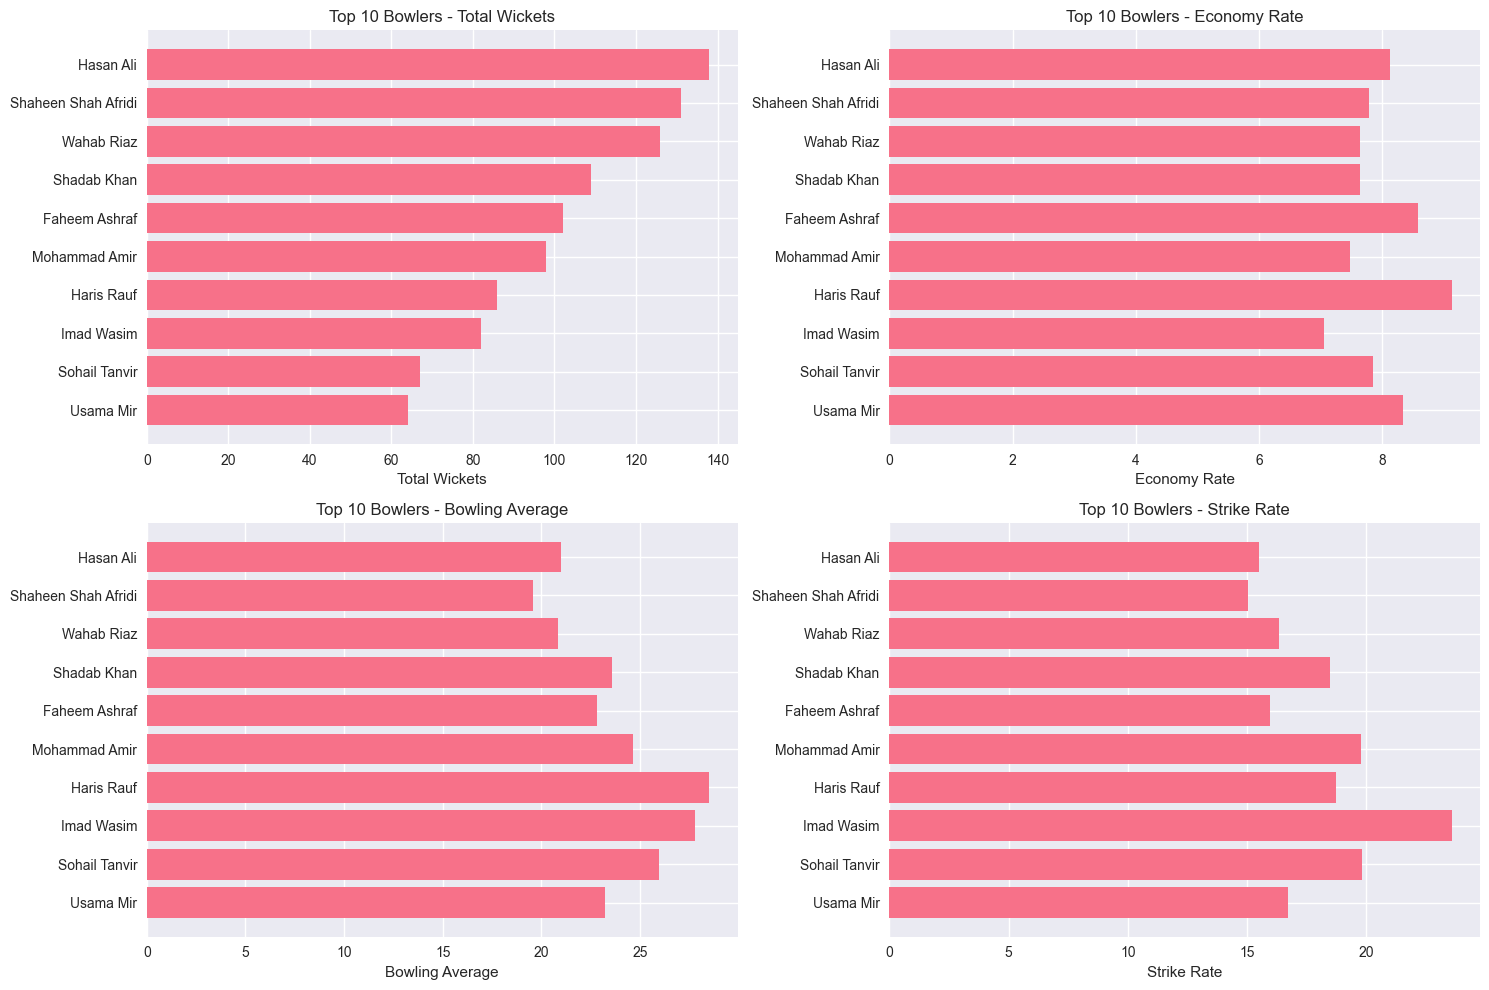

In [13]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Total wickets
axes[0, 0].barh(top_10_bowlers.index, top_10_bowlers['total_wickets'])
axes[0, 0].set_xlabel('Total Wickets')
axes[0, 0].set_title('Top 10 Bowlers - Total Wickets')
axes[0, 0].invert_yaxis()

# Plot 2: Economy rate
axes[0, 1].barh(top_10_bowlers.index, top_10_bowlers['economy_rate'])
axes[0, 1].set_xlabel('Economy Rate')
axes[0, 1].set_title('Top 10 Bowlers - Economy Rate')
axes[0, 1].invert_yaxis()

# Plot 3: Bowling average
axes[1, 0].barh(top_10_bowlers.index, top_10_bowlers['bowling_average'])
axes[1, 0].set_xlabel('Bowling Average')
axes[1, 0].set_title('Top 10 Bowlers - Bowling Average')
axes[1, 0].invert_yaxis()

# Plot 4: Strike rate
axes[1, 1].barh(top_10_bowlers.index, top_10_bowlers['strike_rate'])
axes[1, 1].set_xlabel('Strike Rate')
axes[1, 1].set_title('Top 10 Bowlers - Strike Rate')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Player vs Team Performance

In [14]:
def get_player_vs_team_stats(player_name, player_type='batter'):
    """Get player performance against each team"""
    if player_type == 'batter':
        player_data = df[df['batter'] == player_name]
        if len(player_data) == 0:
            return None
        
        vs_team = player_data.groupby('bowling_team').agg({
            'batsman_runs': 'sum',
            'match_id': 'nunique',
            'is_wicket': 'sum'
        }).rename(columns={
            'batsman_runs': 'runs_scored',
            'match_id': 'matches',
            'is_wicket': 'times_out'
        })
        
        vs_team['average'] = vs_team['runs_scored'] / vs_team['times_out'].replace(0, 1)
        
    else:  # bowler
        player_data = df[df['bowler'] == player_name]
        if len(player_data) == 0:
            return None
        
        vs_team = player_data.groupby('batting_team').agg({
            'is_wicket': 'sum',
            'total_runs': 'sum',
            'match_id': 'nunique'
        }).rename(columns={
            'is_wicket': 'wickets',
            'total_runs': 'runs_conceded',
            'match_id': 'matches'
        })
        
        vs_team['average'] = vs_team['runs_conceded'] / vs_team['wickets'].replace(0, 1)
        vs_team['economy'] = vs_team['runs_conceded'] / (player_data.groupby('batting_team').size() / 6)
    
    return vs_team

# Example: Show top batter's performance against teams
top_batter = top_10_batters.index[0]
print(f"=== {top_batter} Performance vs Teams ===")
vs_team_stats = get_player_vs_team_stats(top_batter, 'batter')
if vs_team_stats is not None:
    display(vs_team_stats)

=== Babar Azam Performance vs Teams ===


,runs_scored,matches,times_out,average
bowling_team,,,,
Islamabad United,832,21,16,52.000000
Karachi Kings,331,6,6,55.166667
Lahore Qalandars,686,19,16,42.875000
Multan Sultans,658,16,17,38.705882
Peshawar Zalmi,646,16,13,49.692308
Quetta Gladiators,639,19,19,33.631579


# Match Winner Prediction Model

In [15]:

print("=== Building Match Winner Prediction Model ===")

# Create match-level features
matches = df[['match_id', 'season', 'venue', 'winner']].drop_duplicates()

# Get teams for each match
match_teams = df.groupby('match_id')['batting_team'].unique().reset_index()
match_teams['team1'] = match_teams['batting_team'].apply(lambda x: x[0] if len(x) > 0 else None)
match_teams['team2'] = match_teams['batting_team'].apply(lambda x: x[1] if len(x) > 1 else None)

# Merge with match info
match_data = matches.merge(match_teams, on='match_id')

# Calculate basic features
# 1. Overall team wins
team_wins = match_data['winner'].value_counts().to_dict()

# 2. Head-to-head wins
def get_h2h_wins(team1, team2, match_df):
    """Calculate head-to-head wins between two teams"""
    matches_between = match_df[
        ((match_df['team1'] == team1) & (match_df['team2'] == team2)) |
        ((match_df['team1'] == team2) & (match_df['team2'] == team1))
    ]
    
    team1_wins = matches_between[matches_between['winner'] == team1].shape[0]
    team2_wins = matches_between[matches_between['winner'] == team2].shape[0]
    
    return team1_wins, team2_wins

# 3. Venue performance
venue_stats = match_data.groupby(['venue', 'winner']).size().reset_index(name='wins')

def get_venue_wins(team, venue, venue_df):
    """Get wins for a team at a specific venue"""
    wins = venue_df[(venue_df['venue'] == venue) & (venue_df['winner'] == team)]
    return wins['wins'].sum() if not wins.empty else 0

# Create feature matrix
features = []
for idx, row in match_data.iterrows():
    if pd.isna(row['team1']) or pd.isna(row['team2']) or pd.isna(row['winner']):
        continue
    
    team1_wins, team2_wins = get_h2h_wins(row['team1'], row['team2'], match_data)
    team1_venue_wins = get_venue_wins(row['team1'], row['venue'], venue_stats)
    team2_venue_wins = get_venue_wins(row['team2'], row['venue'], venue_stats)
    
    features.append({
        'team1_total_wins': team_wins.get(row['team1'], 0),
        'team2_total_wins': team_wins.get(row['team2'], 0),
        'team1_h2h_wins': team1_wins,
        'team2_h2h_wins': team2_wins,
        'team1_venue_wins': team1_venue_wins,
        'team2_venue_wins': team2_venue_wins,
        'winner': 1 if row['winner'] == row['team1'] else 0  # 1 if team1 wins, 0 if team2 wins
    })

# Create DataFrame
features_df = pd.DataFrame(features)
print(f"Feature matrix shape: {features_df.shape}")

# Prepare features and target
X = features_df.drop('winner', axis=1)
y = features_df['winner']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


=== Building Match Winner Prediction Model ===
Feature matrix shape: (311, 7)
Train size: (248, 6), Test size: (63, 6)


# Train and Evaluate Models

In [16]:

# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # For regression model, use different metrics
    if name == 'Gradient Boosting':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_class = (y_pred > 0.5).astype(int)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred_class)
        
        results[name] = {
            'accuracy': accuracy,
            'mae': mae,
            'mse': mse,
            'r2': r2
        }
        
        print(f"\n{name}:")
        print(f"  Accuracy: {accuracy:.3f}")
        print(f"  MAE: {mae:.3f}")
        print(f"  MSE: {mse:.3f}")
        print(f"  R²: {r2:.3f}")
        
    else:  # Classification models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'confusion_matrix': conf_matrix
        }
        
        print(f"\n{name}:")
        print(f"  Accuracy: {accuracy:.3f}")
        print("  Confusion Matrix:")
        print(f"    {conf_matrix[0]}")
        print(f"    {conf_matrix[1]}")



Logistic Regression:
  Accuracy: 0.603
  Confusion Matrix:
    [28  7]
    [18 10]

Random Forest:
  Accuracy: 0.492
  Confusion Matrix:
    [20 15]
    [17 11]

Gradient Boosting:
  Accuracy: 0.603
  MAE: 0.497
  MSE: 0.317
  R²: -0.286


# Feature Importance


=== Feature Importance (Random Forest) ===


,feature,importance
5,team2_venue_wins,0.306005
4,team1_venue_wins,0.255559
3,team2_h2h_wins,0.126923
2,team1_h2h_wins,0.120969
0,team1_total_wins,0.096848
1,team2_total_wins,0.093696


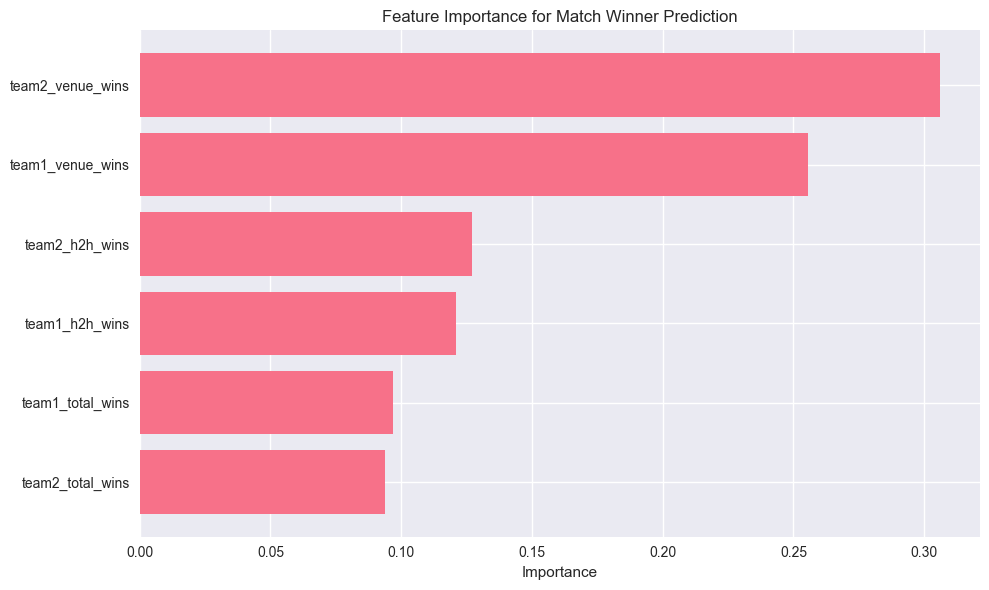

In [17]:

# Get feature importance from Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    
    # Feature importance
    importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n=== Feature Importance (Random Forest) ===")
    display(importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance['feature'], importance['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance for Match Winner Prediction')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


#  Prediction Function

In [18]:

def predict_match_winner(team1, team2, venue):
    """Predict match winner between two teams at a venue"""
    # Check if teams exist in data
    if team1 not in team_wins or team2 not in team_wins:
        return "Teams not found in historical data"
    
    # Calculate features
    team1_wins, team2_wins = get_h2h_wins(team1, team2, match_data)
    team1_venue_wins = get_venue_wins(team1, venue, venue_stats)
    team2_venue_wins = get_venue_wins(team2, venue, venue_stats)
    
    # Create feature vector
    features = pd.DataFrame([{
        'team1_total_wins': team_wins.get(team1, 0),
        'team2_total_wins': team_wins.get(team2, 0),
        'team1_h2h_wins': team1_wins,
        'team2_h2h_wins': team2_wins,
        'team1_venue_wins': team1_venue_wins,
        'team2_venue_wins': team2_venue_wins
    }])
    
    # Use Random Forest for prediction
    rf_model = models['Random Forest']
    prediction = rf_model.predict(features)[0]
    
    winner = team1 if prediction == 1 else team2
    
    # Calculate confidence
    proba = rf_model.predict_proba(features)[0]
    confidence = max(proba)
    
    return {
        'predicted_winner': winner,
        'confidence': round(confidence * 100, 1),
        'team1_win_prob': round(proba[1] * 100, 1),
        'team2_win_prob': round(proba[0] * 100, 1)
    }

# Test the prediction function
print("\n=== Test Predictions ===")
test_matches = [
    ("Karachi Kings", "Lahore Qalandars", "National Stadium Karachi"),
    ("Islamabad United", "Peshawar Zalmi", "Rawalpindi Cricket Stadium"),
    ("Multan Sultans", "Quetta Gladiators", "Multan Cricket Stadium")
]

for team1, team2, venue in test_matches:
    result = predict_match_winner(team1, team2, venue)
    print(f"\n{team1} vs {team2} at {venue}:")
    print(f"  Predicted Winner: {result['predicted_winner']}")
    print(f"  Confidence: {result['confidence']}%")
    print(f"  {team1} win probability: {result['team1_win_prob']}%")
    print(f"  {team2} win probability: {result['team2_win_prob']}%")


=== Test Predictions ===

Karachi Kings vs Lahore Qalandars at National Stadium Karachi:
  Predicted Winner: Karachi Kings
  Confidence: 70.0%
  Karachi Kings win probability: 70.0%
  Lahore Qalandars win probability: 30.0%

Islamabad United vs Peshawar Zalmi at Rawalpindi Cricket Stadium:
  Predicted Winner: Peshawar Zalmi
  Confidence: 50.1%
  Islamabad United win probability: 49.9%
  Peshawar Zalmi win probability: 50.1%

Multan Sultans vs Quetta Gladiators at Multan Cricket Stadium:
  Predicted Winner: Multan Sultans
  Confidence: 98.1%
  Multan Sultans win probability: 98.1%
  Quetta Gladiators win probability: 1.9%


# Season Analysis


=== Season-wise Analysis ===


<Figure size 1200x800 with 0 Axes>

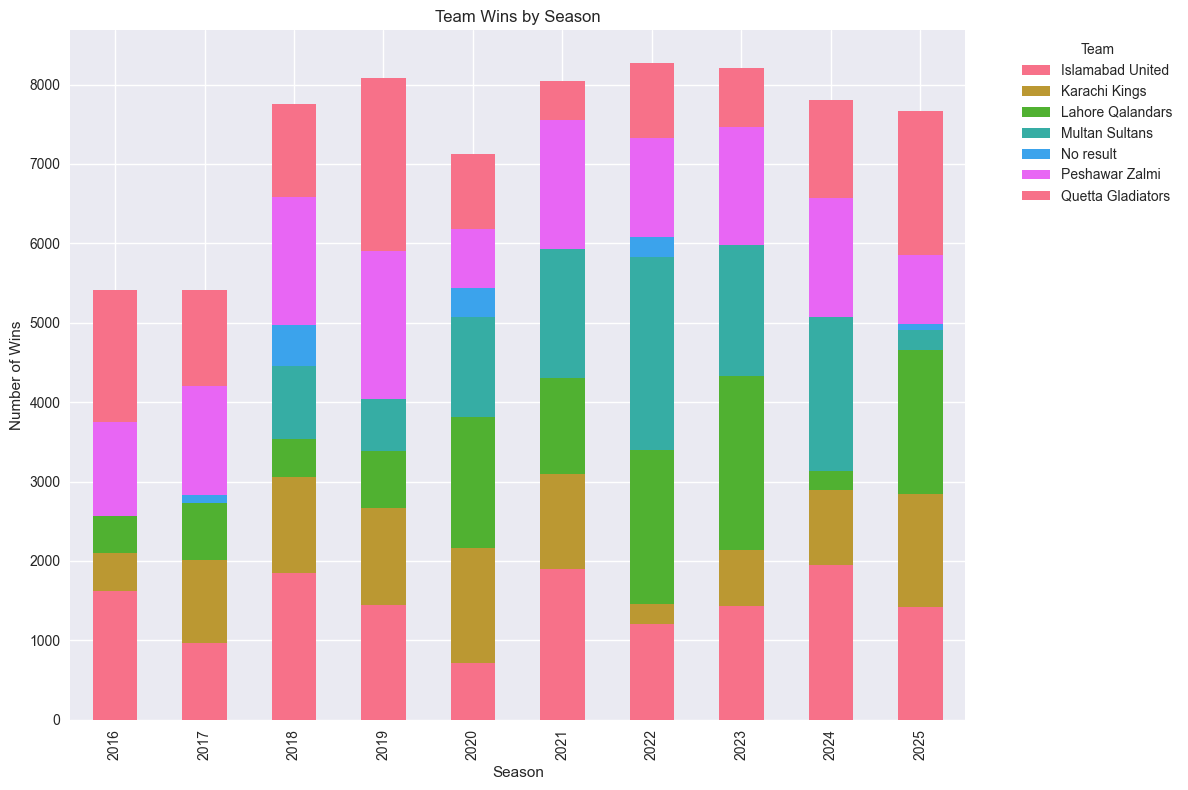

Season Winners:


,season,winner,player_of_match
0,2016,Quetta Gladiators,Mohammad Nawaz (3)
1,2017,Islamabad United,Mohammad Sami
2,2018,Multan Sultans,L Ronchi
3,2019,Islamabad United,SR Watson
4,2020,Quetta Gladiators,Babar Azam
5,2021,Karachi Kings,Hazratullah
6,2022,Multan Sultans,Shan Masood
7,2023,Lahore Qalandars,Fakhar Zaman
8,2024,Islamabad United,Babar Azam
9,2025,Islamabad United,JM Vince


In [19]:

# Cell 16: Season Analysis
# Analyze performance by season
print("\n=== Season-wise Analysis ===")

# Team performance by season
season_team_performance = df.groupby(['season', 'winner']).size().reset_index(name='wins')
pivot_table = season_team_performance.pivot(index='season', columns='winner', values='wins').fillna(0)

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Team Wins by Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display season winners
season_winners = df.groupby('season').agg({
    'winner': 'first',  # Assuming winner is consistent for all rows of a match
    'player_of_match': lambda x: x.mode()[0] if len(x.mode()) > 0 else None
}).reset_index()

print("Season Winners:")
display(season_winners)

# Player of Match Analysis


=== Player of Match Analysis ===
Top 10 Players with Most 'Player of Match' Awards:
player_of_match
Fakhar Zaman           2677
RR Rossouw             1938
Babar Azam             1886
Faheem Ashraf          1689
Kamran Akmal           1644
L Ronchi               1582
Mohammad Rizwan        1457
Shaheen Shah Afridi    1443
SR Watson              1424
Shadab Khan            1393
Name: count, dtype: int64


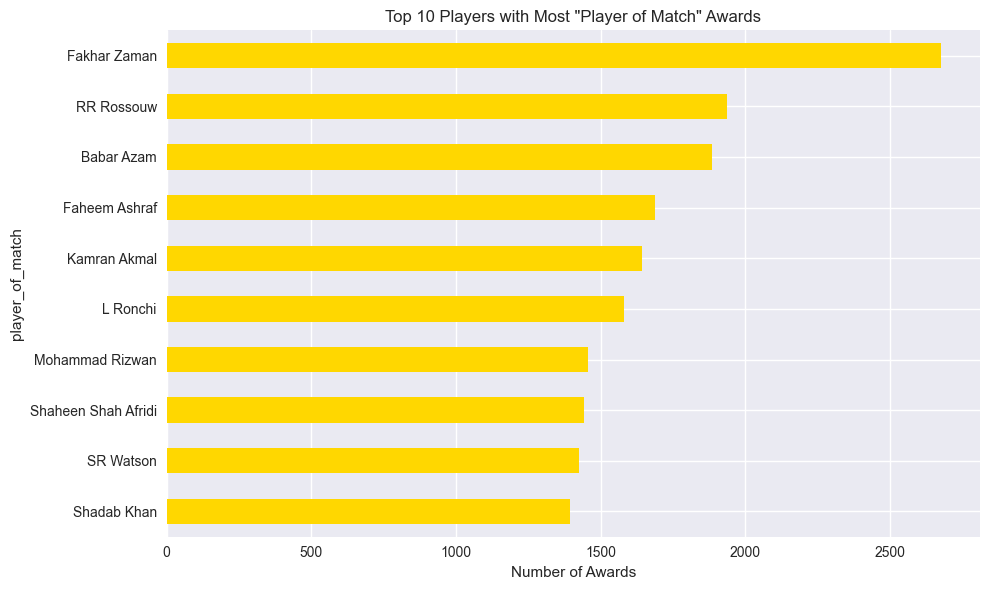

In [20]:

print("\n=== Player of Match Analysis ===")

# Count player of match awards
player_of_match_counts = df['player_of_match'].value_counts().head(10)
print("Top 10 Players with Most 'Player of Match' Awards:")
print(player_of_match_counts)

plt.figure(figsize=(10, 6))
player_of_match_counts.plot(kind='barh', color='gold')
plt.xlabel('Number of Awards')
plt.title('Top 10 Players with Most "Player of Match" Awards')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Imports for Player Prediction Models



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import joblib
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# For Jupyter Notebook display
try:
    from IPython.display import display
except:
    display = print

print("=== PSL Player Performance Prediction Models ===")

# Load the data
df = pd.read_csv('PSL Complete Dataset (2016-2025).csv')
print(f"Dataset loaded successfully! Shape: {df.shape}")

# Clean data (reuse your cleaning function)
def clean_data(df):
    # Fill missing values
    df.fillna({
        'extras_type': 'none',
        'dismissal_kind': 'not out',
        'fielder': 'none',
        'umpire_1': 'unknown',
        'umpire_2': 'unknown'
    }, inplace=True)
    
    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Create match year if season is missing
    df['season'] = df['season'].fillna(df['date'].dt.year)
    
    return df

df = clean_data(df)
print("Data cleaning completed!")


=== PSL Player Performance Prediction Models ===


Dataset loaded successfully! Shape: (73784, 27)
Data cleaning completed!


In [22]:
def create_batsman_features(df, batter_name=None, lookback_matches=10):
    """
    Create comprehensive features for batsman performance prediction
    Returns features DataFrame with target column 'next_match_runs'
    """
    all_features = []
    
    if batter_name:
        batters_list = [batter_name]
    else:
        # Get batters with sufficient matches
        batter_match_counts = df.groupby('batter')['match_id'].nunique()
        batters_list = batter_match_counts[batter_match_counts > lookback_matches].index.tolist()
    
    for batter in batters_list:
        batter_data = df[df['batter'] == batter].copy()
        
        # Get runs per match
        match_runs = batter_data.groupby('match_id').agg({
            'batsman_runs': 'sum',
            'over': 'count',  # balls faced
            'venue': 'first',
            'batting_team': 'first',
            'bowling_team': 'first',
            'season': 'first',
            'inning': 'first'
        }).reset_index()
        
        # Sort by match_id (assuming chronological)
        match_runs = match_runs.sort_values('match_id').reset_index(drop=True)
        
        if len(match_runs) <= lookback_matches:
            continue
        
        # Create rolling features
        for i in range(lookback_matches, len(match_runs)-1):  # -1 because we predict next match
            current_match = match_runs.iloc[i]
            next_match_runs = match_runs.iloc[i+1]['batsman_runs']  # Target
            
            # Get last N matches for features
            last_n_matches = match_runs.iloc[i-lookback_matches:i]
            
            # Performance against specific bowling team
            vs_team_data = last_n_matches[last_n_matches['bowling_team'] == current_match['bowling_team']]
            
            # Performance at venue
            at_venue_data = last_n_matches[last_n_matches['venue'] == current_match['venue']]
            
            # Calculate strike rate safely
            total_runs = last_n_matches['batsman_runs'].sum()
            total_balls = last_n_matches['over'].sum()
            strike_rate = (total_runs / total_balls * 100) if total_balls > 0 else 0
            
            # Calculate form slope safely
            last_5_runs = last_n_matches.tail(5)['batsman_runs'].values
            if len(last_5_runs) >= 2:
                form_slope = np.polyfit(range(len(last_5_runs)), last_5_runs, 1)[0]
            else:
                form_slope = 0
            
            features = {
                'batter': batter,
                'match_id': current_match['match_id'],
                
                # Historical performance features
                'avg_last_10': last_n_matches['batsman_runs'].mean(),
                'std_last_10': last_n_matches['batsman_runs'].std(),
                'max_last_10': last_n_matches['batsman_runs'].max(),
                'min_last_10': last_n_matches['batsman_runs'].min(),
                'median_last_10': last_n_matches['batsman_runs'].median(),
                
                # Recent form (last 5 matches)
                'avg_last_5': last_n_matches.tail(5)['batsman_runs'].mean(),
                'form_slope': form_slope,
                
                # Balls faced metrics
                'balls_per_match': last_n_matches['over'].mean(),
                'strike_rate_last_10': strike_rate,
                
                # Match context features
                'venue': current_match['venue'],
                'batting_team': current_match['batting_team'],
                'bowling_team': current_match['bowling_team'],
                'season': current_match['season'],
                'inning': current_match['inning'],
                
                # Performance against specific bowling team
                'avg_vs_team': vs_team_data['batsman_runs'].mean() if len(vs_team_data) > 0 else last_n_matches['batsman_runs'].mean(),
                'matches_vs_team': len(vs_team_data),
                
                # Performance at venue
                'avg_at_venue': at_venue_data['batsman_runs'].mean() if len(at_venue_data) > 0 else last_n_matches['batsman_runs'].mean(),
                
                # Target variable
                'next_match_runs': next_match_runs
            }
            
            all_features.append(features)
    
    return pd.DataFrame(all_features)

def create_bowler_features(df, bowler_name=None, lookback_matches=10):
    """
    Create comprehensive features for bowler performance prediction
    Returns features DataFrame with target column 'next_match_wickets'
    """
    all_features = []
    
    if bowler_name:
        bowlers_list = [bowler_name]
    else:
        # Get bowlers with sufficient matches
        bowler_match_counts = df.groupby('bowler')['match_id'].nunique()
        bowlers_list = bowler_match_counts[bowler_match_counts > lookback_matches].index.tolist()
    
    for bowler in bowlers_list:
        bowler_data = df[df['bowler'] == bowler].copy()
        
        # Get wickets per match
        match_stats = bowler_data.groupby('match_id').agg({
            'is_wicket': 'sum',
            'total_runs': 'sum',
            'over': 'count',  # balls bowled
            'venue': 'first',
            'bowling_team': 'first',
            'batting_team': 'first',
            'season': 'first',
            'inning': 'first'
        }).reset_index()
        
        # Calculate economy rate safely
        def calculate_economy(row):
            if row['over'] > 0:
                return (row['total_runs'] / (row['over'] / 6))
            return 9.0
        
        match_stats['economy'] = match_stats.apply(calculate_economy, axis=1)
        
        # Sort by match_id
        match_stats = match_stats.sort_values('match_id').reset_index(drop=True)
        
        if len(match_stats) <= lookback_matches:
            continue
        
        # Create rolling features
        for i in range(lookback_matches, len(match_stats)-1):
            current_match = match_stats.iloc[i]
            next_match_wickets = match_stats.iloc[i+1]['is_wicket']  # Target
            
            # Get last N matches for features
            last_n_matches = match_stats.iloc[i-lookback_matches:i]
            
            # Performance against batting team
            vs_team_data = last_n_matches[last_n_matches['batting_team'] == current_match['batting_team']]
            
            # Performance at venue
            at_venue_data = last_n_matches[last_n_matches['venue'] == current_match['venue']]
            
            # Calculate form slope safely
            last_5_wickets = last_n_matches.tail(5)['is_wicket'].values
            if len(last_5_wickets) >= 2:
                form_slope = np.polyfit(range(len(last_5_wickets)), last_5_wickets, 1)[0]
            else:
                form_slope = 0
            
            features = {
                'bowler': bowler,
                'match_id': current_match['match_id'],
                
                # Wicket-taking features
                'wickets_avg_last_10': last_n_matches['is_wicket'].mean(),
                'wickets_std_last_10': last_n_matches['is_wicket'].std(),
                'wickets_max_last_10': last_n_matches['is_wicket'].max(),
                'wickets_median_last_10': last_n_matches['is_wicket'].median(),
                
                # Economy features
                'economy_avg_last_10': last_n_matches['economy'].mean(),
                'economy_std_last_10': last_n_matches['economy'].std(),
                
                # Recent form
                'wickets_last_5': last_n_matches.tail(5)['is_wicket'].mean(),
                'economy_last_5': last_n_matches.tail(5)['economy'].mean(),
                'form_slope': form_slope,
                
                # Bowling workload
                'balls_per_match': last_n_matches['over'].mean(),
                'overs_last_match': last_n_matches.iloc[-1]['over'] / 6 if len(last_n_matches) > 0 else 4,
                
                # Match context
                'venue': current_match['venue'],
                'bowling_team': current_match['bowling_team'],
                'batting_team': current_match['batting_team'],
                'season': current_match['season'],
                'inning': current_match['inning'],
                
                # Performance against batting team
                'avg_wickets_vs_team': vs_team_data['is_wicket'].mean() if len(vs_team_data) > 0 else last_n_matches['is_wicket'].mean(),
                'economy_vs_team': vs_team_data['economy'].mean() if len(vs_team_data) > 0 else last_n_matches['economy'].mean(),
                
                # Target variable
                'next_match_wickets': next_match_wickets
            }
            
            all_features.append(features)
    
    return pd.DataFrame(all_features)

In [23]:
print("Creating features for batsmen...")
batsman_features = create_batsman_features(df)
print(f"Batsman features shape: {batsman_features.shape}")

print("\nCreating features for bowlers...")
bowler_features = create_bowler_features(df)
print(f"Bowler features shape: {bowler_features.shape}")

# Display samples
print("\nSample batsman features:")
display(batsman_features[['batter', 'avg_last_10', 'strike_rate_last_10', 'next_match_runs']].head())

print("\nSample bowler features:")
display(bowler_features[['bowler', 'wickets_avg_last_10', 'economy_avg_last_10', 'next_match_wickets']].head())

Creating features for batsmen...
Batsman features shape: (2556, 20)

Creating features for bowlers...
Bowler features shape: (1962, 21)

Sample batsman features:


,batter,avg_last_10,strike_rate_last_10,next_match_runs
0,AD Hales,28.8,128.571429,22
1,AD Hales,32.2,135.294118,11
2,AD Hales,32.8,133.877551,29
3,AD Hales,32.8,133.333333,46
4,AD Hales,34.3,134.509804,41



Sample bowler features:


,bowler,wickets_avg_last_10,economy_avg_last_10,next_match_wickets
0,AD Russell,1.7,8.487069,2
1,AD Russell,1.8,8.105490,1
2,AD Russell,1.7,8.443421,1
3,AD Russell,1.7,8.393421,0
4,AD Russell,1.7,8.351754,0


# Train Batsman Runs Prediction Models

In [ ]:

print("\n" + "="*50)
print("TRAINING BATSMAN RUNS PREDICTION MODELS")
print("="*50)

# Prepare batsman data
X_bat = batsman_features.drop(['batter', 'match_id', 'next_match_runs'], axis=1)
y_bat = batsman_features['next_match_runs']

# Identify categorical columns
categorical_cols = ['venue', 'batting_team', 'bowling_team', 'inning']
numerical_cols = [col for col in X_bat.columns if col not in categorical_cols + ['season']]

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_bat[col] = le.fit_transform(X_bat[col].astype(str))
    label_encoders[col] = le

# Split data
X_train_bat, X_test_bat, y_train_bat, y_test_bat = train_test_split(
    X_bat, y_bat, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train_bat.shape[0]}, Test samples: {X_test_bat.shape[0]}")

# Scale features
scaler_bat = StandardScaler()
X_train_bat_scaled = scaler_bat.fit_transform(X_train_bat)
X_test_bat_scaled = scaler_bat.transform(X_test_bat)

# Define models
bat_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5),
    'Linear Regression': LinearRegression()
}

# Train and evaluate
bat_results = {}
bat_trained_models = {}

for name, model in bat_models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_bat_scaled, y_train_bat)
    
    # Predict
    y_pred_train = model.predict(X_train_bat_scaled)
    y_pred_test = model.predict(X_test_bat_scaled)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train_bat, y_pred_train)
    test_mae = mean_absolute_error(y_test_bat, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train_bat, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_bat, y_pred_test))
    train_r2 = r2_score(y_train_bat, y_pred_train)
    test_r2 = r2_score(y_test_bat, y_pred_test)
    
    # Store results
    bat_results[name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }
    
    # Store trained model
    bat_trained_models[name] = {
        'model': model,
        'scaler': scaler_bat,
        'label_encoders': label_encoders
    }
    
    print(f"  Test MAE: {test_mae:.2f}")
    print(f"  Test RMSE: {test_rmse:.2f}")
    print(f"  Test R²: {test_r2:.3f}")

# Display results
print("\n=== Batsman Models Comparison ===")
bat_results_df = pd.DataFrame(bat_results).T
display(bat_results_df)

# Select best model
best_bat_model_name = bat_results_df['Test R²'].idxmax()
print(f"\nBest batsman model: {best_bat_model_name}")


# Train Bowler Wickets Prediction Models

In [25]:

print("\n" + "="*50)
print("TRAINING BOWLER WICKETS PREDICTION MODELS")
print("="*50)

# Prepare bowler data
X_bowl = bowler_features.drop(['bowler', 'match_id', 'next_match_wickets'], axis=1)
y_bowl = bowler_features['next_match_wickets']

# Identify categorical columns
categorical_cols_bowl = ['venue', 'bowling_team', 'batting_team', 'inning']
numerical_cols_bowl = [col for col in X_bowl.columns if col not in categorical_cols_bowl + ['season']]

# Encode categorical variables
label_encoders_bowl = {}
for col in categorical_cols_bowl:
    le = LabelEncoder()
    X_bowl[col] = le.fit_transform(X_bowl[col].astype(str))
    label_encoders_bowl[col] = le

# Split data
X_train_bowl, X_test_bowl, y_train_bowl, y_test_bowl = train_test_split(
    X_bowl, y_bowl, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train_bowl.shape[0]}, Test samples: {X_test_bowl.shape[0]}")

# Scale features
scaler_bowl = StandardScaler()
X_train_bowl_scaled = scaler_bowl.fit_transform(X_train_bowl)
X_test_bowl_scaled = scaler_bowl.transform(X_test_bowl)

# Define models
bowl_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5),
    'Linear Regression': LinearRegression()
}

# Train and evaluate
bowl_results = {}
bowl_trained_models = {}

for name, model in bowl_models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_bowl_scaled, y_train_bowl)
    
    # Predict
    y_pred_train = model.predict(X_train_bowl_scaled)
    y_pred_test = model.predict(X_test_bowl_scaled)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train_bowl, y_pred_train)
    test_mae = mean_absolute_error(y_test_bowl, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train_bowl, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_bowl, y_pred_test))
    train_r2 = r2_score(y_train_bowl, y_pred_train)
    test_r2 = r2_score(y_test_bowl, y_pred_test)
    
    # For wickets, also calculate accuracy for rounded predictions
    y_pred_test_rounded = np.round(y_pred_test).clip(0, 5)
    accuracy = accuracy_score(y_test_bowl.round(), y_pred_test_rounded)
    
    # Store results
    bowl_results[name] = {
        'Test MAE': test_mae,
        'Test RMSE': test_rmse,
        'Test R²': test_r2,
        'Accuracy (rounded)': accuracy
    }
    
    # Store trained model
    bowl_trained_models[name] = {
        'model': model,
        'scaler': scaler_bowl,
        'label_encoders': label_encoders_bowl
    }
    
    print(f"  Test MAE: {test_mae:.2f}")
    print(f"  Test RMSE: {test_rmse:.2f}")
    print(f"  Test R²: {test_r2:.3f}")
    print(f"  Accuracy: {accuracy:.3f}")

# Display results
print("\n=== Bowler Models Comparison ===")
bowl_results_df = pd.DataFrame(bowl_results).T
display(bowl_results_df)

# Select best model
best_bowl_model_name = bowl_results_df['Test R²'].idxmax()
print(f"\nBest bowler model: {best_bowl_model_name}")



TRAINING BOWLER WICKETS PREDICTION MODELS
Training samples: 1569, Test samples: 393

Training Random Forest...
  Test MAE: 0.84
  Test RMSE: 1.05
  Test R²: 0.005
  Accuracy: 0.356

Training Gradient Boosting...
  Test MAE: 0.87
  Test RMSE: 1.08
  Test R²: -0.059
  Accuracy: 0.366

Training Linear Regression...
  Test MAE: 0.82
  Test RMSE: 1.04
  Test R²: 0.021
  Accuracy: 0.356

=== Bowler Models Comparison ===


,Test MAE,Test RMSE,Test R²,Accuracy (rounded)
Random Forest,0.837569,1.051229,0.004508,0.356234
Gradient Boosting,0.865380,1.084170,-0.058857,0.366412
Linear Regression,0.822563,1.042257,0.021430,0.356234



Best bowler model: Linear Regression


# Train Match Winner Prediction Model (Enhanced)

In [26]:

print("\n" + "="*50)
print("TRAINING MATCH WINNER PREDICTION MODEL")
print("="*50)

def create_match_features(df):
    """Create features for match winner prediction"""
    # Get unique matches with winner
    match_data = df[['match_id', 'venue', 'winner']].drop_duplicates()
    
    # Get teams for each match
    match_teams = df.groupby('match_id')['batting_team'].unique().reset_index()
    match_teams['team1'] = match_teams['batting_team'].apply(lambda x: x[0] if len(x) > 0 else None)
    match_teams['team2'] = match_teams['batting_team'].apply(lambda x: x[1] if len(x) > 1 else None)
    
    # Merge
    match_data = match_data.merge(match_teams, on='match_id')
    
    # Calculate team statistics
    team_stats = {}
    for team in pd.concat([match_data['team1'], match_data['team2']]).unique():
        if pd.isna(team):
            continue
        
        team_matches = match_data[(match_data['team1'] == team) | (match_data['team2'] == team)]
        team_wins = team_matches[team_matches['winner'] == team]
        
        team_stats[team] = {
            'total_wins': len(team_wins),
            'total_matches': len(team_matches),
            'win_rate': len(team_wins) / max(1, len(team_matches))
        }
    
    # Create features
    features_list = []
    
    for idx, row in match_data.iterrows():
        if pd.isna(row['team1']) or pd.isna(row['team2']) or pd.isna(row['winner']):
            continue
        
        team1_stats = team_stats.get(row['team1'], {'total_wins': 0, 'total_matches': 1, 'win_rate': 0.5})
        team2_stats = team_stats.get(row['team2'], {'total_wins': 0, 'total_matches': 1, 'win_rate': 0.5})
        
        # Head-to-head calculation
        h2h_matches = match_data[
            ((match_data['team1'] == row['team1']) & (match_data['team2'] == row['team2'])) |
            ((match_data['team1'] == row['team2']) & (match_data['team2'] == row['team1']))
        ]
        team1_h2h_wins = len(h2h_matches[h2h_matches['winner'] == row['team1']])
        team2_h2h_wins = len(h2h_matches[h2h_matches['winner'] == row['team2']])
        
        # Venue performance
        venue_matches = match_data[match_data['venue'] == row['venue']]
        team1_venue_wins = len(venue_matches[venue_matches['winner'] == row['team1']])
        team2_venue_wins = len(venue_matches[venue_matches['winner'] == row['team2']])
        
        features = {
            'team1_total_wins': team1_stats['total_wins'],
            'team2_total_wins': team2_stats['total_wins'],
            'team1_win_rate': team1_stats['win_rate'],
            'team2_win_rate': team2_stats['win_rate'],
            'team1_h2h_wins': team1_h2h_wins,
            'team2_h2h_wins': team2_h2h_wins,
            'team1_venue_wins': team1_venue_wins,
            'team2_venue_wins': team2_venue_wins,
            'h2h_difference': team1_h2h_wins - team2_h2h_wins,
            'venue_advantage': team1_venue_wins - team2_venue_wins,
            'win_rate_difference': team1_stats['win_rate'] - team2_stats['win_rate'],
            'winner': 1 if row['winner'] == row['team1'] else 0  # 1 = team1 wins, 0 = team2 wins
        }
        
        features_list.append(features)
    
    return pd.DataFrame(features_list)

# Create match features
match_features = create_match_features(df)
print(f"Match features shape: {match_features.shape}")

# Prepare match data
X_match = match_features.drop('winner', axis=1)
y_match = match_features['winner']

# Split data
X_train_match, X_test_match, y_train_match, y_test_match = train_test_split(
    X_match, y_match, test_size=0.2, random_state=42, stratify=y_match
)
print(f"Training samples: {X_train_match.shape[0]}, Test samples: {X_test_match.shape[0]}")

# Scale features
scaler_match = StandardScaler()
X_train_match_scaled = scaler_match.fit_transform(X_train_match)
X_test_match_scaled = scaler_match.transform(X_test_match)

# Train match winner models (using regression for consistency, though classification might be better)
match_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5),
    'Linear Regression': LinearRegression()
}

match_results = {}
match_trained_models = {}

for name, model in match_models.items():
    print(f"\nTraining {name} for match prediction...")
    
    # Train model
    model.fit(X_train_match_scaled, y_train_match)
    
    # Predict
    y_pred_test = model.predict(X_test_match_scaled)
    y_pred_test_class = (y_pred_test > 0.5).astype(int)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_match, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test_match, y_pred_test))
    r2 = r2_score(y_test_match, y_pred_test)
    accuracy = accuracy_score(y_test_match, y_pred_test_class)
    
    # Store results
    match_results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Accuracy': accuracy
    }
    
    # Store trained model
    match_trained_models[name] = {
        'model': model,
        'scaler': scaler_match
    }
    
    print(f"  MAE: {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R²: {r2:.3f}")
    print(f"  Accuracy: {accuracy:.3f}")

# Display results
print("\n=== Match Prediction Models Comparison ===")
match_results_df = pd.DataFrame(match_results).T
display(match_results_df)

# Select best model
best_match_model_name = match_results_df['Accuracy'].idxmax()
print(f"\nBest match prediction model: {best_match_model_name}")



TRAINING MATCH WINNER PREDICTION MODEL
Match features shape: (311, 12)
Training samples: 248, Test samples: 63

Training Random Forest for match prediction...
  MAE: 0.508
  RMSE: 0.574
  R²: -0.334
  Accuracy: 0.508

Training Gradient Boosting for match prediction...
  MAE: 0.515
  RMSE: 0.627
  R²: -0.591
  Accuracy: 0.524

Training Linear Regression for match prediction...
  MAE: 0.463
  RMSE: 0.506
  R²: -0.039
  Accuracy: 0.603

=== Match Prediction Models Comparison ===


,MAE,RMSE,R²,Accuracy
Random Forest,0.507778,0.573977,-0.334271,0.507937
Gradient Boosting,0.514651,0.626824,-0.591280,0.523810
Linear Regression,0.463076,0.506397,-0.038572,0.603175



Best match prediction model: Linear Regression


## Prediction Functions for Django Integration (FIXED VERSION)

In [27]:
print("\n" + "="*50)
print("CREATING PREDICTION FUNCTIONS FOR DJANGO")
print("="*50)

class PSLPredictor:
    """Main class for all PSL predictions"""
    
    def __init__(self, bat_model_dict, bowl_model_dict, match_model_dict):
        # Batsman model setup
        self.bat_model = bat_model_dict['model']
        self.bat_scaler = bat_model_dict['scaler']
        self.bat_label_encoders = bat_model_dict['label_encoders']
        
        # Bowler model setup
        self.bowl_model = bowl_model_dict['model']
        self.bowl_scaler = bowl_model_dict['scaler']
        self.bowl_label_encoders = bowl_model_dict['label_encoders']
        
        # Match model setup
        self.match_model = match_model_dict['model']
        self.match_scaler = match_model_dict['scaler']
    
    def predict_batsman_runs(self, batter_name, df, opponent_team, venue, inning=1, batting_team=None):
        """
        Predict runs for a batsman in next match
        
        Parameters:
        - batter_name: Name of batsman
        - df: Historical data DataFrame
        - opponent_team: Bowling team
        - venue: Match venue
        - inning: Innings number (1 or 2)
        - batting_team: Batsman's team (optional, inferred from data)
        """
        # Get recent data for the batsman
        batter_data = df[df['batter'] == batter_name]
        
        if len(batter_data) < 10:
            return {"error": "Insufficient data. Need at least 10 matches."}
        
        # Get last 10 matches
        match_runs = batter_data.groupby('match_id').agg({
            'batsman_runs': 'sum',
            'over': 'count',
            'venue': 'first',
            'batting_team': 'first',
            'bowling_team': 'first',
            'season': 'first',
            'inning': 'first'
        }).reset_index()
        
        match_runs = match_runs.sort_values('match_id').tail(10)
        
        # Calculate features (same as training)
        features = {
            'avg_last_10': match_runs['batsman_runs'].mean(),
            'std_last_10': match_runs['batsman_runs'].std(),
            'max_last_10': match_runs['batsman_runs'].max(),
            'min_last_10': match_runs['batsman_runs'].min(),
            'median_last_10': match_runs['batsman_runs'].median(),
            'avg_last_5': match_runs.tail(5)['batsman_runs'].mean(),
            'form_slope': np.polyfit(range(5), match_runs.tail(5)['batsman_runs'].values, 1)[0],
            'balls_per_match': match_runs['over'].mean(),
            'strike_rate_last_10': (match_runs['batsman_runs'].sum() / match_runs['over'].sum()) * 100 if match_runs['over'].sum() > 0 else 0,
            'venue': venue,
            'batting_team': batting_team or match_runs.iloc[-1]['batting_team'],
            'bowling_team': opponent_team,
            'season': 2025,  # Current season
            'inning': inning,
        }
        
        # Add performance against team
        vs_team_data = match_runs[match_runs['bowling_team'] == opponent_team]
        features['avg_vs_team'] = vs_team_data['batsman_runs'].mean() if len(vs_team_data) > 0 else features['avg_last_10']
        features['matches_vs_team'] = len(vs_team_data)
        
        # Add performance at venue
        at_venue_data = match_runs[match_runs['venue'] == venue]
        features['avg_at_venue'] = at_venue_data['batsman_runs'].mean() if len(at_venue_data) > 0 else features['avg_last_10']
        
        # Create DataFrame for prediction
        pred_df = pd.DataFrame([features])
        
        # Encode categorical features
        for col, le in self.bat_label_encoders.items():
            pred_df[col] = le.transform(pred_df[col].astype(str))
        
        # Scale features
        pred_scaled = self.bat_scaler.transform(pred_df)
        
        # Predict and convert to Python float
        predicted_runs = float(self.bat_model.predict(pred_scaled)[0])
        
        return {
            'batsman': batter_name,
            'predicted_runs': round(predicted_runs, 1),
            'confidence_interval': [
                float(round(max(0, predicted_runs - 10), 1)),  # Convert to float
                float(round(predicted_runs + 10, 1))           # Convert to float
            ],
            'recent_average': float(round(features['avg_last_10'], 1)),
            'form_indicator': 'Improving' if features['form_slope'] > 0 else 'Declining',
            'venue_record': float(round(features['avg_at_venue'], 1)),
            'vs_opponent_record': float(round(features['avg_vs_team'], 1))
        }
    
    def predict_bowler_wickets(self, bowler_name, df, opponent_team, venue, inning=1, bowling_team=None):
        """
        Predict wickets for a bowler in next match
        """
        # Get recent data
        bowler_data = df[df['bowler'] == bowler_name]
        
        if len(bowler_data) < 10:
            return {"error": "Insufficient data. Need at least 10 matches."}
        
        # Get last 10 matches
        match_stats = bowler_data.groupby('match_id').agg({
            'is_wicket': 'sum',
            'total_runs': 'sum',
            'over': 'count',
            'venue': 'first',
            'bowling_team': 'first',
            'batting_team': 'first',
            'season': 'first',
            'inning': 'first'
        }).reset_index()
        
        match_stats = match_stats.sort_values('match_id').tail(10)
        
        # Calculate economy safely
        match_stats['economy'] = match_stats.apply(
            lambda x: (x['total_runs'] / (x['over']/6)) if x['over'] > 0 else 9.0, 
            axis=1
        )
        
        # Calculate features
        features = {
            'wickets_avg_last_10': float(match_stats['is_wicket'].mean()),
            'wickets_std_last_10': float(match_stats['is_wicket'].std()),
            'wickets_max_last_10': float(match_stats['is_wicket'].max()),
            'wickets_median_last_10': float(match_stats['is_wicket'].median()),
            'economy_avg_last_10': float(match_stats['economy'].mean()),
            'economy_std_last_10': float(match_stats['economy'].std()),
            'wickets_last_5': float(match_stats.tail(5)['is_wicket'].mean()),
            'economy_last_5': float(match_stats.tail(5)['economy'].mean()),
            'form_slope': float(np.polyfit(range(5), match_stats.tail(5)['is_wicket'].values, 1)[0]),
            'balls_per_match': float(match_stats['over'].mean()),
            'overs_last_match': float(match_stats.iloc[-1]['over'] / 6) if len(match_stats) > 0 else 4.0,
            'venue': venue,
            'bowling_team': bowling_team or match_stats.iloc[-1]['bowling_team'],
            'batting_team': opponent_team,
            'season': 2025,
            'inning': inning,
        }
        
        # Add performance against team
        vs_team_data = match_stats[match_stats['batting_team'] == opponent_team]
        features['avg_wickets_vs_team'] = float(vs_team_data['is_wicket'].mean() if len(vs_team_data) > 0 else features['wickets_avg_last_10'])
        features['economy_vs_team'] = float(vs_team_data['economy'].mean() if len(vs_team_data) > 0 else features['economy_avg_last_10'])
        
        # Create DataFrame
        pred_df = pd.DataFrame([features])
        
        # Encode categorical features
        for col, le in self.bowl_label_encoders.items():
            pred_df[col] = le.transform(pred_df[col].astype(str))
        
        # Scale and predict
        pred_scaled = self.bowl_scaler.transform(pred_df)
        predicted_wickets = float(self.bowl_model.predict(pred_scaled)[0])
        
        # Round to nearest 0.5 for display
        predicted_wickets_rounded = round(predicted_wickets * 2) / 2
        
        # Calculate venue record separately for display (not for model)
        at_venue_data = match_stats[match_stats['venue'] == venue]
        venue_record = float(at_venue_data['is_wicket'].mean() if len(at_venue_data) > 0 else features['wickets_avg_last_10'])
        
        return {
            'bowler': bowler_name,
            'predicted_wickets': float(predicted_wickets_rounded),
            'likely_range': f"{max(0, round(predicted_wickets - 1, 1))}-{round(predicted_wickets + 1, 1)}",
            'predicted_economy': round(features['economy_avg_last_10'], 2),
            'recent_form': 'Improving' if features['form_slope'] > 0 else 'Declining',
            'venue_record': f"{round(venue_record, 1)} wickets",
            'vs_opponent_record': f"{round(features['avg_wickets_vs_team'], 1)} wickets"
        }
    
    def predict_match_winner(self, team1, team2, venue, df):
        """
        Predict match winner between two teams - FINAL FIXED VERSION
        """
        # Get unique matches with teams information
        match_data = df[['match_id', 'venue', 'winner']].drop_duplicates()
        
        # Get teams for each match from the ball-by-ball data
        match_teams = df.groupby('match_id')['batting_team'].unique().reset_index()
        match_teams['team1'] = match_teams['batting_team'].apply(lambda x: x[0] if len(x) > 0 else None)
        match_teams['team2'] = match_teams['batting_team'].apply(lambda x: x[1] if len(x) > 1 else None)
        
        # Merge to get match data with teams
        match_data_with_teams = match_data.merge(match_teams, on='match_id')
        
        # Filter only matches involving our two teams
        relevant_matches = match_data_with_teams[
            ((match_data_with_teams['team1'] == team1) & (match_data_with_teams['team2'] == team2)) |
            ((match_data_with_teams['team1'] == team2) & (match_data_with_teams['team2'] == team1))
        ]
        
        # Count head-to-head wins
        team1_h2h_wins = len(relevant_matches[relevant_matches['winner'] == team1])
        team2_h2h_wins = len(relevant_matches[relevant_matches['winner'] == team2])
        total_h2h_matches = len(relevant_matches)
        
        # Get all matches for each team (for overall stats)
        team1_all_matches = match_data_with_teams[
            (match_data_with_teams['team1'] == team1) | (match_data_with_teams['team2'] == team1)
        ]
        team2_all_matches = match_data_with_teams[
            (match_data_with_teams['team1'] == team2) | (match_data_with_teams['team2'] == team2)
        ]
        
        team1_total_wins = len(team1_all_matches[team1_all_matches['winner'] == team1])
        team2_total_wins = len(team2_all_matches[team2_all_matches['winner'] == team2])
        
        team1_total_matches = len(team1_all_matches)
        team2_total_matches = len(team2_all_matches)
        
        # Venue performance
        venue_matches = match_data_with_teams[match_data_with_teams['venue'] == venue]
        team1_venue_wins = len(venue_matches[
            ((venue_matches['team1'] == team1) | (venue_matches['team2'] == team1)) & 
            (venue_matches['winner'] == team1)
        ])
        team2_venue_wins = len(venue_matches[
            ((venue_matches['team1'] == team2) | (venue_matches['team2'] == team2)) & 
            (venue_matches['winner'] == team2)
        ])
        
        # Calculate win rates
        team1_win_rate = team1_total_wins / max(1, team1_total_matches)
        team2_win_rate = team2_total_wins / max(1, team2_total_matches)
        
        # Create feature vector
        features = {
            'team1_total_wins': team1_total_wins,
            'team2_total_wins': team2_total_wins,
            'team1_win_rate': team1_win_rate,
            'team2_win_rate': team2_win_rate,
            'team1_h2h_wins': team1_h2h_wins,
            'team2_h2h_wins': team2_h2h_wins,
            'team1_venue_wins': team1_venue_wins,
            'team2_venue_wins': team2_venue_wins,
            'h2h_difference': team1_h2h_wins - team2_h2h_wins,
            'venue_advantage': team1_venue_wins - team2_venue_wins,
            'win_rate_difference': team1_win_rate - team2_win_rate
        }
        
        # Create DataFrame and scale
        pred_df = pd.DataFrame([features])
        
        # Handle case where we might not have enough data
        if len(relevant_matches) == 0:
            # If no head-to-head history, use overall win rates
            if team1_win_rate > team2_win_rate:
                winner = team1
                confidence = team1_win_rate * 100
            else:
                winner = team2
                confidence = team2_win_rate * 100
                
            return {
                'predicted_winner': winner,
                'confidence': float(round(confidence, 1)),
                'team1_win_probability': float(round(team1_win_rate * 100, 1)),
                'team2_win_probability': float(round(team2_win_rate * 100, 1)),
                'key_factors': {
                    'head_to_head': f"No previous matches",
                    'venue_advantage': team1 if team1_venue_wins > team2_venue_wins else team2,
                    'current_form': team1 if team1_win_rate > team2_win_rate else team2
                }
            }
    
        # Scale and predict
        pred_scaled = self.match_scaler.transform(pred_df)
        
        # Predict and clamp between 0 and 1
        prediction = float(self.match_model.predict(pred_scaled)[0])
        prediction = max(0.0, min(1.0, prediction))  # Clamp to [0, 1]
        
        # If prediction is extreme (0 or 1), add some uncertainty
        if prediction <= 0.1:
            prediction = 0.1 + (team1_win_rate * 0.2)  # Minimum 10%, plus some based on form
        elif prediction >= 0.9:
            prediction = 0.9 - (team2_win_rate * 0.2)  # Maximum 90%, minus some based on opponent form
        
        # Determine winner and probabilities
        if prediction >= 0.5:
            winner = team1
            team1_prob = prediction
            team2_prob = 1 - prediction
        else:
            winner = team2
            team2_prob = 1 - prediction
            team1_prob = prediction
        
        confidence = max(team1_prob, team2_prob) * 100
        
        return {
            'predicted_winner': winner,
            'confidence': float(round(confidence, 1)),
            'team1_win_probability': float(round(team1_prob * 100, 1)),
            'team2_win_probability': float(round(team2_prob * 100, 1)),
            'key_factors': {
                'head_to_head': f"{team1} {team1_h2h_wins}-{team2_h2h_wins} {team2}",
                'venue_advantage': team1 if team1_venue_wins > team2_venue_wins else team2,
                'current_form': team1 if team1_win_rate > team2_win_rate else team2
            }
        }

# Initialize predictor with best models
predictor = PSLPredictor(
    bat_trained_models[best_bat_model_name],
    bowl_trained_models[best_bowl_model_name],
    match_trained_models[best_match_model_name]
)

print("PSL Predictor initialized successfully!")


CREATING PREDICTION FUNCTIONS FOR DJANGO
PSL Predictor initialized successfully!


# Test Predictions and Save Models

In [28]:
print("\n" + "="*50)
print("TESTING PREDICTIONS")
print("="*50)

# Test batsman prediction
print("\n1. Testing Batsman Prediction:")
top_batter = batsman_features['batter'].mode()[0] if len(batsman_features) > 0 else df['batter'].mode()[0]
if top_batter:
    bat_prediction = predictor.predict_batsman_runs(
        batter_name=top_batter,
        df=df,
        opponent_team="Lahore Qalandars",
        venue="National Stadium, Karachi",
        inning=1  # ✅ CORRECT: 'inning' not 'innings'
    )
    print(f"Prediction for {top_batter}:")
    for key, value in bat_prediction.items():
        print(f"  {key}: {value}")

# Test bowler prediction
print("\n2. Testing Bowler Prediction:")
top_bowler = bowler_features['bowler'].mode()[0] if len(bowler_features) > 0 else df['bowler'].mode()[0]
if top_bowler:
    bowl_prediction = predictor.predict_bowler_wickets(
        bowler_name=top_bowler,
        df=df,
        opponent_team="Karachi Kings",
        venue="Gaddafi Stadium, Lahore",
        inning=1  # ✅ CORRECT: 'inning' not 'innings'
    )
    print(f"Prediction for {top_bowler}:")
    for key, value in bowl_prediction.items():
        print(f"  {key}: {value}")

# Test match prediction
print("\n3. Testing Match Prediction:")
match_prediction = predictor.predict_match_winner(
    team1="Lahore Qalandars",
    team2="Karachi Kings",
    venue="National Stadium, Karachi",
    df=df
)
print(f"Match Prediction:")
for key, value in match_prediction.items():
    print(f"  {key}: {value}")


TESTING PREDICTIONS

1. Testing Batsman Prediction:
Prediction for Babar Azam:
  batsman: Babar Azam
  predicted_runs: 32.3
  confidence_interval: [22.3, 42.3]
  recent_average: 28.8
  form_indicator: Improving
  venue_record: 46.0
  vs_opponent_record: 36.0

2. Testing Bowler Prediction:
Prediction for Imad Wasim:
  bowler: Imad Wasim
  predicted_wickets: 1.5
  likely_range: 0.3-2.3
  predicted_economy: 7.31
  recent_form: Improving
  venue_record: 1.0 wickets
  vs_opponent_record: 1.5 wickets

3. Testing Match Prediction:
Match Prediction:
  predicted_winner: Karachi Kings
  confidence: 73.6
  team1_win_probability: 26.4
  team2_win_probability: 73.6
  key_factors: {'head_to_head': 'Lahore Qalandars 7-14 Karachi Kings', 'venue_advantage': 'Karachi Kings', 'current_form': 'Lahore Qalandars'}


# Save Models for Django

In [29]:
print("\n" + "="*50)
print("SAVING MODELS FOR DJANGO")
print("="*50)

# Create a dictionary with all models and components
models_to_save = {
    'batsman_model': bat_trained_models[best_bat_model_name],
    'bowler_model': bowl_trained_models[best_bowl_model_name],
    'match_model': match_trained_models[best_match_model_name],
    'best_batsman_model_name': best_bat_model_name,
    'best_bowler_model_name': best_bowl_model_name,
    'best_match_model_name': best_match_model_name,
    'batsman_features_sample': X_bat.columns.tolist(),
    'bowler_features_sample': X_bowl.columns.tolist(),
    'match_features_sample': X_match.columns.tolist()
}

# Save to file
joblib.dump(models_to_save, 'psl_prediction_models.pkl')
print("Models saved to 'psl_prediction_models.pkl'")

# Also save predictor class instance
joblib.dump(predictor, 'psl_predictor.pkl')
print("Predictor instance saved to 'psl_predictor.pkl'")

# Save feature column names for reference
feature_info = {
    'batsman_features': X_bat.columns.tolist(),
    'bowler_features': X_bowl.columns.tolist(),
    'match_features': X_match.columns.tolist(),
    'categorical_columns_batsman': categorical_cols,
    'categorical_columns_bowler': categorical_cols_bowl
}

with open('feature_info.json', 'w') as f:
    json.dump(feature_info, f)
print("Feature information saved to 'feature_info.json'")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETE!")
print("="*50)
print(f"Best Batsman Model: {best_bat_model_name}")
print(f"Best Bowler Model: {best_bowl_model_name}")
print(f"Best Match Model: {best_match_model_name}")
print("\n Models are ready for Django integration!")
print(" Files created:")
print("   - psl_prediction_models.pkl (All model components)")
print("   - psl_predictor.pkl (Predictor class instance)")
print("   - feature_info.json (Feature information)")
print("\n Use 'psl_predictor.pkl' in your Django views!")


SAVING MODELS FOR DJANGO
Models saved to 'psl_prediction_models.pkl'
Predictor instance saved to 'psl_predictor.pkl'
Feature information saved to 'feature_info.json'

MODEL TRAINING COMPLETE!
Best Batsman Model: Random Forest
Best Bowler Model: Linear Regression
Best Match Model: Linear Regression

 Models are ready for Django integration!
 Files created:
   - psl_prediction_models.pkl (All model components)
   - psl_predictor.pkl (Predictor class instance)
   - feature_info.json (Feature information)

 Use 'psl_predictor.pkl' in your Django views!
